# Impor Llb

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tampilan Dataset

In [4]:
marketing = pd.read_csv('DirectMarketing.csv')
                             
marketing

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671


# Drop Data

In [5]:
marketing = marketing.drop(['Age', 'Gender','OwnHome', 'Married', 'Location', 'Children', 'History', 'Catalogs'], axis = 1)
                             
marketing

,Salary,AmountSpent
0,47500,755
1,63600,1318
2,13500,296
3,85600,2436
4,68400,1304
...,...,...
995,19400,384
996,40500,1073
997,44800,1417
998,79000,671


# Clustering

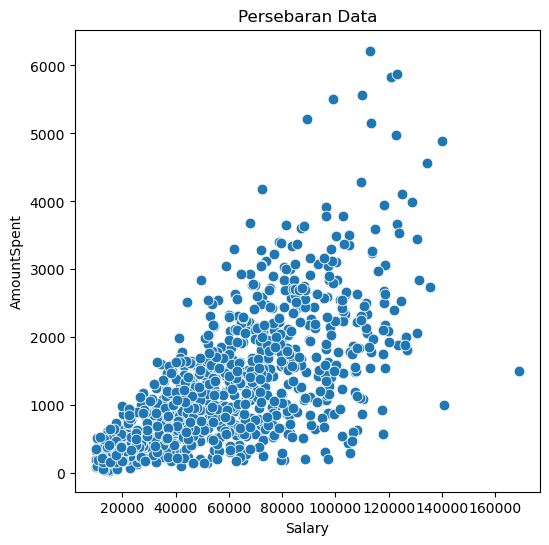

In [6]:
#Persebaran Data
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Salary', y = 'AmountSpent', data = marketing, s = 60)
plt.title('Persebaran Data')
plt.show()

# Elbow Methode

In [7]:
# HItung Within Cluster sum of square error (WCSS) untuk tiap kluster yang berbeda

from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(marketing)
    wcss.append(kmModel.inertia_)

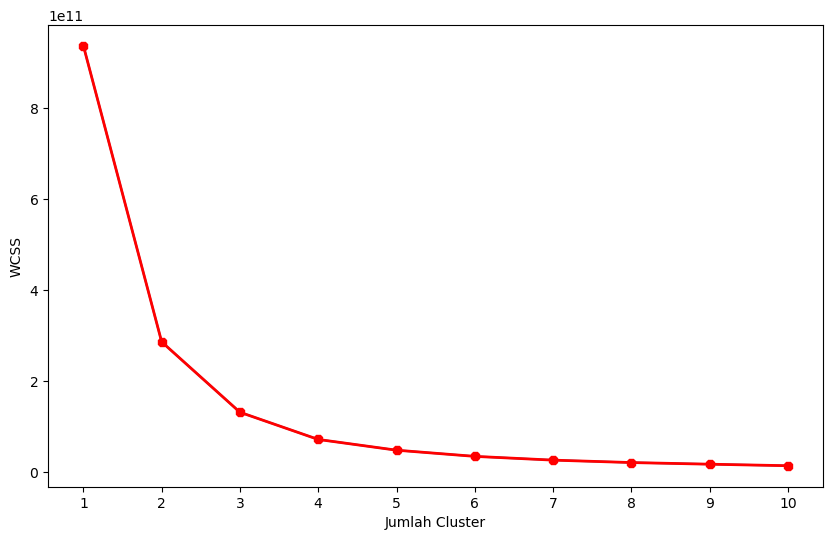

In [8]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [9]:
# model dengan s

kmModelFix = KMeans(n_clusters = 5, n_init = 10) #n_init = 10 / n_init = 'auto'
kmModelFix.fit(marketing)

# memprediksi hasil
hasil_prediksi = kmModelFix.predict(marketing)
hasil_prediksi

array([1, 4, 2, 0, 4, 2, 1, 4, 1, 0, 1, 3, 1, 3, 3, 0, 0, 0, 1, 2, 2, 1,
       4, 1, 1, 0, 4, 4, 4, 2, 1, 4, 0, 3, 4, 2, 4, 1, 1, 2, 4, 0, 4, 0,
       1, 3, 0, 4, 3, 0, 0, 0, 3, 4, 1, 4, 4, 4, 1, 1, 4, 2, 2, 2, 4, 4,
       4, 2, 1, 4, 2, 0, 4, 2, 2, 4, 4, 0, 2, 2, 1, 4, 1, 2, 3, 1, 1, 2,
       1, 2, 4, 3, 4, 1, 2, 2, 3, 2, 0, 0, 2, 1, 4, 1, 2, 0, 0, 2, 4, 0,
       0, 1, 3, 3, 4, 2, 4, 4, 4, 2, 2, 1, 4, 3, 2, 2, 1, 2, 1, 2, 3, 4,
       2, 0, 1, 1, 2, 1, 4, 2, 2, 0, 3, 2, 0, 2, 3, 4, 1, 2, 1, 2, 3, 4,
       2, 1, 1, 1, 2, 3, 1, 2, 2, 4, 1, 1, 0, 3, 0, 3, 2, 4, 1, 4, 0, 4,
       1, 2, 4, 0, 1, 4, 1, 3, 1, 0, 1, 1, 1, 3, 2, 0, 1, 2, 2, 4, 3, 3,
       2, 2, 0, 0, 0, 0, 4, 0, 1, 2, 4, 2, 4, 4, 2, 2, 4, 3, 3, 2, 1, 1,
       1, 0, 1, 4, 3, 2, 2, 0, 2, 4, 2, 4, 1, 4, 2, 4, 1, 1, 4, 2, 1, 4,
       3, 2, 0, 3, 4, 1, 0, 2, 2, 2, 2, 2, 4, 0, 2, 4, 0, 2, 2, 2, 1, 3,
       0, 0, 0, 4, 2, 3, 4, 0, 2, 4, 0, 3, 2, 1, 2, 1, 4, 3, 3, 4, 1, 1,
       0, 1, 2, 2, 4, 1, 4, 4, 1, 4, 4, 3, 1, 1, 3,

In [10]:
marketing['Label'] = hasil_prediksi
marketing.head()

,Salary,AmountSpent,Label
0,47500,755,1
1,63600,1318,4
2,13500,296,2
3,85600,2436,0
4,68400,1304,4


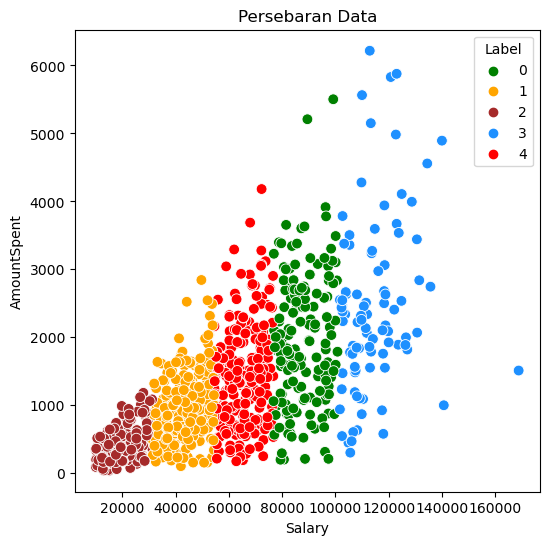

In [11]:
# Persebaran Data beserta labelnya

plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Salary', y = 'AmountSpent', hue = 'Label',
palette = ['green', 'orange', 'brown', 'dodgerblue', 'red'], legend = 'full', data = marketing,
s = 60)
plt.title('Persebaran Data')
plt.show()